In [1]:
%matplotlib inline

In [1544]:
reload(asymmetric_processes)

<module 'asymmetric_processes' from 'asymmetric_processes.py'>

In [166]:
import numpy as np
import pandas as pd
import asymmetric_processes
from asymmetric_processes import CircleProcess, BoundaryProcess, State, ncr
import matplotlib.pyplot as plt
import seaborn as sns # comment out if you don't have installed
import sympy
from speeds import count

In [3]:
import scipy.sparse as sparse

# Intro to `State` and `CircleProcess`

The `State` class helps find "open spots to right" and other information about a state. 

The `CircleProcess` class enumerates the possible states, and determines the state transitions

In [1293]:
p.is_symbolic()

True

In [ ]:
def new_count(N, k, R):
    return 1.*N / (R * (k-R) * (N - k - R)) * np.math.factorial(k-1) * np.math.factorial(N-k-1) / np.math.factorial(R-1)**2 / np.math.factorial(k-R-1) / np.math.factorial(N-k-R-1)

$n! \sim \sqrt{2\pi n} \left(\frac{n}{e}\right)^n$

In [201]:
def new_count(N, k, R):
    return 1. * N / R * ncr(k-1, R-1) * ncr(N - k - 1, R-1)

$\begin{align*}
\mathbb{P}[R/N] &= \frac{N}{R} \frac{{k-1 \choose R-1} {N - k - 1 \choose R-1}}{N \choose k} \\
&= \frac{N}{R} \frac{(k-1)!(N-k-1)!k!(N-k)!}{(R-1)!(k-R)!(R-1)!(N-k-r)!N!} \\
&= \frac{1}{r} \frac{(N\alpha-1)!(N-N\alpha-1)!(N\alpha)!(N-N\alpha)!}{(Nr-1)!(N\alpha-Nr)!(Nr-1)!(N-N\alpha-Nr)!N!} \\
&\propto_r \left[r(Nr-1)!(N\alpha-Nr)!(Nr-1)!(N-N\alpha-Nr)!\right]^{-1}\\
&\propto_r \left[r(Nr-1)^{2Nr-1}(N\alpha-Nr)^{N\alpha-Nr + 1/2} (N-N\alpha-Nr)^{N-N\alpha-Nr + 1/2}\right]^{-1} \\
&\propto_r \left[\frac{r\sqrt{(\alpha-r)(1-\alpha-r)}}{Nr-1} (Nr-1)^{2Nr}(\alpha-r)^{N\alpha-Nr } (1-\alpha-r)^{N-N\alpha-Nr}\right]^{-1}
\end{align*}$

$\begin{align*}
&\sim \frac{1}{r} \frac{\sqrt{2\pi(N\alpha-1)} \left(\frac{N\alpha -1}{e}\right)^{N\alpha-1}\sqrt{2\pi(N-N\alpha-1)} \left(\frac{N-N\alpha -1}{e}\right)^{N-N\alpha-1}\sqrt{2\pi N\alpha} \left(\frac{N\alpha}{e}\right)^{N\alpha}\sqrt{2\pi(N-N\alpha)} \left(\frac{N-N\alpha}{e}\right)^{N-N\alpha}}{\sqrt{2\pi(Nr-1)} \left(\frac{Nr -1}{e}\right)^{Nr-1}\sqrt{2\pi(N\alpha-Nr)} \left(\frac{N\alpha - Nr}{e}\right)^{N\alpha - Nr}\sqrt{2\pi(Nr-1)} \left(\frac{Nr -1}{e}\right)^{Nr-1}\sqrt{2\pi(N-N\alpha-Nr)} \left(\frac{N-N\alpha - Nr}{e}\right)^{N-N\alpha - Nr}!\sqrt{2\pi N} \left(\frac{N}{e}\right)^{N}} \\
&= \frac{e^{Nr-1 + N\alpha - Nr + Nr-1 + N-N\alpha-Nr + N - N\alpha + 1 - N + N\alpha + 1 - N\alpha - N + N\alpha}}{\sqrt{2\pi r^2}} \frac{(N\alpha - 1)^{N\alpha - 1/2}(N - N\alpha - 1)^{N - N\alpha - 1/2}(N\alpha)^{N\alpha + 1/2}(N-N\alpha)^{N-N\alpha+1/2}}{(Nr-1)^{Nr-1/2}(N\alpha-Nr)^{N\alpha-Nr+1/2}(Nr-1)^{Nr-1/2}(N-N\alpha-Nr)^{N-N\alpha-Nr+1/2}N^{N+1/2}} \\
&= \frac{1}{\sqrt{2\pi r^2}} \frac{(N\alpha - 1)^{N\alpha - 1/2}(N - N\alpha - 1)^{N - N\alpha - 1/2}(N\alpha)^{N\alpha + 1/2}(N-N\alpha)^{N-N\alpha+1/2}}{(Nr-1)^{Nr-1/2}(N\alpha-Nr)^{N\alpha-Nr+1/2}(Nr-1)^{Nr-1/2}(N-N\alpha-Nr)^{N-N\alpha-Nr+1/2}N^{N+1/2}}
\end{align*}$

$\begin{align*}
\mathbb{P}[r=\alpha] &= (1-\alpha) \left(\frac{(N-N\alpha-1)!}{(N-1)!} \right)^2\\
\end{align*}$

$\begin{align*}
\epsilon &> (N\alpha+1/2)\log(N\alpha) - (N\alpha - 1/2)\log(N\alpha - 1) \\
&> (N\alpha)\log(\frac{N\alpha}{N\alpha - 1}) - \frac{1}{2}\log(\frac{1}{(N\alpha - 1)(N\alpha)})\\
\frac{1}{2}\log(\frac{e^{2\epsilon}}{(N\alpha - 1)(N\alpha)}) &> -\log\left(\left(1 - \frac{1}{N\alpha}\right)^{N\alpha}\right) > 1
\end{align*}$

$$\frac{e^{2\epsilon}}{(N\alpha - 1)(N\alpha)} > e^2$$
$$e^{2\epsilon - 2} > (N\alpha - 1)(N\alpha) = N^2\alpha^2 - N\alpha$$
$$ N^2\alpha^2 - N\alpha - e^{2\epsilon-2} < 0$$

$ 1/2 - \sqrt{e^{2\epsilon} + \frac{1}{4}} < N\alpha < 1/2 + \sqrt{e^{2\epsilon} + \frac{1}{4}} $$

$ x^x(x+a)^{x+a} \approx \exp\left(-2\log(1/x)x + (a - a\log(1/x)) + a^2 / (2x) - a^3/(6x^2) + O(1/x^3) \right)$
$ = \exp\left( a + \log{(x^{2x} x^a)} + a^2 / (2x) \right)$
$ = x^{2x}x^a e^a e^{\frac{a^2}{2x}}$

$$x^{(x+.5)}(x-1)^{(x-.5)} \approx \frac{x^{2x}}{e} e^{-\frac{1}{12x^2}}$$
$$(xa)^{(xa+.5)}(x(1-a))^{x(1-a)+.5} = x^{x+1} (1-a)^{x(1-a)}a^{xa} \sqrt{a(1-a)}$$

In [209]:
N = 100
k = 60
R = 30
1. * count(N, k, R) / new_count(N, k, R)

1.0

In [1546]:
p = CircleProcess(4, 2, None)

In [1547]:
S, T, V = p.matrices()

In [174]:
np.math.fa

AttributeError: 'module' object has no attribute 'fa'

In [115]:
r = a**5*b**4 + a**5*b**3 + a**4*b**5 + a**4*b**4 + a**3*b**5

In [72]:
z = r.as_expr()

In [89]:
terms, syms = z.as_terms()

In [88]:
syms.index(a)

0

In [80]:
z.leadterm(a)[0]

b**5

In [234]:

def extract_a_b_terms(exp):
    a, b = sympy.Symbol('a'), sympy.Symbol('b')
    terms, syms = exp.as_terms()
    if a in syms:
        ia = syms.index(a)
    else:
        ia = -1
    if b in syms:
        ib = syms.index(b)
    else:
        ib = -1
    results = []
    for term in terms:
        coef = term[1][0][0]
        pows = term[1][1]
        if ia > -1:
            ac = pows[ia]
        else:
            ac = 0
        if ib > -1:
            bc = pows[ib]
        else:
            bc = 0
        results += [(coef, ac, bc)]
    return results
def pop_max_terms(terms, isA):
    c, a, b = zip(*terms)
    if isA:
        m = max(a)
        popped = [terms[i] for i in range(len(terms)) if a[i] == m]
        remaining = [terms[i] for i in range(len(terms)) if a[i] != m]
    else:
        m = max(b)
        popped = [terms[i] for i in range(len(terms)) if b[i] == m]
        remaining = [terms[i] for i in range(len(terms)) if b[i] != m]
    return m, popped, remaining
def get_groups(exp):
    terms = extract_a_b_terms(exp)
    As = dict()
    Bs = dict()
    c = 0
    isA = True
    while len(terms) > 0:
        isA = c % 2 == 0
        m, group, terms = pop_max_terms(terms, isA)
        if isA:
            As[m] = group
        else:
            Bs[m] = group
        c += 1
    return As, Bs
get_groups(a**5*b**4 + a**5*b**3 + a**4*b**5 + a**4*b**4 + a**3*b**5)

({4: [(1.0, 4, 4)], 5: [(1.0, 5, 3), (1.0, 5, 4)]},
 {5: [(1.0, 3, 5), (1.0, 4, 5)]})

In [261]:
def map_groups_to_transitions(N, As, Bs):
    a_idx = sorted(As.keys(), reverse=True)
    b_idx = sorted(Bs.keys())
    result = []
    for a in a_idx:
        result += [As[a]]
    for b in b_idx:
        result += [Bs[b]]
    count = list(range(len(result)))
    if N in a_idx:
        count = count[1:]
    if N in b_idx:
        count = count[:-1]
    idx = dict(zip(range(len(count)), count))
    return result, idx

In [257]:
def apply_transition(s, partition, mapping, transitions, i):
    a, b = sympy.Symbol('a'), sympy.Symbol('b')
    s_new = s.move_left(transitions[i])
    poly = 0
    for j in range(len(partition)):
        terms = partition[j]
        for term in terms:
            c, a_pow, b_pow = term
            if mapping[i] == j:
                poly += c * a**(a_pow+1) * b**b_pow
                poly += c * a**a_pow * b**(b_pow+1)
            else:
                poly += c * a**a_pow * b**b_pow
    return s_new, poly

In [297]:
s = State("10010", cycle=False)
As, Bs = get_groups(memo[str(s)])
partition, mapping = map_groups_to_transitions(N, As, Bs)
transitions = sorted(s.open_spots_to_left())
for i in range(len(transitions)):
    s_new, poly = apply_transition(s, partition, mapping, transitions, i)
    print s_new, poly


10100 2.0*a**5*b**4 + 1.0*a**5*b**3 + 2.0*a**4*b**5 + 1.0*a**3*b**5 + 1.0*a**3*b**4 + 1.0*a**2*b**5


In [281]:
apply_transition(s, partition, mapping, transitions, 0)

(10100,
 2.0*a**5*b**4 + 1.0*a**5*b**3 + 2.0*a**4*b**5 + 1.0*a**4*b**4 + 2.0*a**3*b**5 + 1.0*a**2*b**5)

In [300]:
memo[str(s)]

1.0*a**5*b**4 + 1.0*a**5*b**3 + 1.0*a**4*b**5 + 1.0*a**4*b**4 + 1.0*a**3*b**5 + 1.0*a**3*b**4 + 1.0*a**2*b**5

In [299]:
As, Bs

({4: [(1.0, 4, 4)], 5: [(1.0, 5, 3), (1.0, 5, 4)]},
 {4: [(1.0, 3, 4)], 5: [(1.0, 2, 5), (1.0, 3, 5), (1.0, 4, 5)]})

In [298]:
partition, mapping

([[(1.0, 5, 3), (1.0, 5, 4)],
  [(1.0, 4, 4)],
  [(1.0, 3, 4)],
  [(1.0, 2, 5), (1.0, 3, 5), (1.0, 4, 5)]],
 {0: 1, 1: 2})

In [321]:
N = 6
a = sympy.Symbol('a')
b = sympy.Symbol('b')
memo = dict([('0'*i + '1'*(N-i), b**i * a**(N-i))  for i in range(N+1)])
queue = []
queue = [State(s, cycle=False) for s in memo]

In [322]:
while len(queue) > 0:
    s = queue.pop()
    As, Bs = get_groups(memo[str(s)])
    partition, mapping = map_groups_to_transitions(N, As, Bs)
    transitions = sorted(s.open_spots_to_left())
    for i in range(len(transitions)):
        s_new, poly = apply_transition(s, partition, mapping, transitions, i)
        if str(s_new) not in memo:
            memo[str(s_new)] = poly
            queue += [s_new]
        elif memo[str(s_new)] != poly:
            print s_new
            print "\t", memo[str(s_new)]
            print "\t", poly
            

101000
	3.0*a**6*b**5 + 1.0*a**6*b**4 + 3.0*a**5*b**6 + 1.0*a**5*b**5 + 3.0*a**4*b**6 + 2.0*a**3*b**6 + 1.0*a**2*b**6
	3.0*a**6*b**5 + 1.0*a**6*b**4 + 3.0*a**5*b**6 + 2.0*a**4*b**6 + 1.0*a**4*b**5 + 2.0*a**3*b**6 + 1.0*a**2*b**6
010100
	2.0*a**5*b**5 + 1.0*a**5*b**4 + 2.0*a**4*b**6 + 1.0*a**4*b**5 + 2.0*a**3*b**6 + 1.0*a**2*b**6
	2.0*a**5*b**5 + 1.0*a**5*b**4 + 2.0*a**4*b**6 + 1.0*a**3*b**6 + 1.0*a**3*b**5 + 1.0*a**2*b**6
100100
	2.0*a**6*b**5 + 1.0*a**6*b**4 + 2.0*a**5*b**6 + 1.0*a**5*b**5 + 2.0*a**4*b**6 + 1.0*a**4*b**5 + 2.0*a**3*b**6 + 1.0*a**2*b**6
	2.0*a**6*b**5 + 1.0*a**6*b**4 + 2.0*a**5*b**6 + 1.0*a**4*b**6 + 1.0*a**4*b**5 + 1.0*a**3*b**6 + 1.0*a**3*b**5 + 1.0*a**2*b**6
101100
	3.0*a**6*b**5 + 2.0*a**6*b**4 + 1.0*a**6*b**3 + 3.0*a**5*b**6 + 2.0*a**5*b**5 + 1.0*a**5*b**4 + 3.0*a**4*b**6 + 1.0*a**3*b**6
	2.0*a**6*b**5 + 2.0*a**6*b**4 + 1.0*a**6*b**3 + 2.0*a**5*b**6 + 3.0*a**5*b**5 + 1.0*a**5*b**4 + 3.0*a**4*b**6 + 1.0*a**3*b**6
110100
	5.0*a**6*b**5 + 3.0*a**6*b**4 + 1.0*a**6*b**

In [308]:
dict([(k, str(memo[k]).replace("**", "^").replace("1.0*", "").replace(".0", "")) for k in memo])

{'0000': 'b^4',
 '0001': 'a*b^3',
 '0010': 'a^2*b^3 + a*b^4',
 '0011': 'a^2*b^2',
 '0100': 'a^3*b^3 + a^2*b^4 + a*b^4',
 '0101': 'a^3*b^2 + a^2*b^3',
 '0110': 'a^3*b^3 + a^3*b^2 + a^2*b^4',
 '0111': 'a^3*b',
 '1000': 'a^4*b^3 + a^3*b^4 + a^2*b^4 + a*b^4',
 '1001': 'a^4*b^2 + a^3*b^3 + a^2*b^3',
 '1010': 'a^4*b^3 + a^4*b^2 + a^3*b^4 + a^3*b^3 + a^2*b^4',
 '1011': 'a^4*b + a^3*b^2',
 '1100': '2*a^4*b^3 + a^4*b^2 + 2*a^3*b^4 + a^2*b^4',
 '1101': 'a^4*b^2 + a^4*b + a^3*b^3',
 '1110': 'a^4*b^3 + a^4*b^2 + a^4*b + a^3*b^4',
 '1111': 'a^4'}

In [285]:
str(memo['11000'] )

'2.0*a**5*b**4 + 1.0*a**5*b**3 + 2.0*a**4*b**5 + 1.0*a**4*b**4 + 2.0*a**3*b**5 + 1.0*a**2*b**5'

In [233]:
map_groups_to_transitions(6, As, Bs)

[[(1.0, 5, 3), (1.0, 5, 4)], [(1.0, 4, 5), (1.0, 5, 5)]]

In [214]:
extract_a_b_terms(a**5*b**4 + a**5*b**3 + a**4*b**5 + a**4*b**4 + a**3*b**5)

[(1.0, 3, 5), (1.0, 4, 4), (1.0, 4, 5), (1.0, 5, 3), (1.0, 5, 4)]

In [142]:
terms[0][1][0][0]

TypeError: 'int' object has no attribute '__getitem__'

In [ ]:
s.open_spots_to_left()

In [156]:
z=sympy.expr.Expr("a**6*b**4 + a**6*b**3 + a**4*b**4 + a**5*b**4 + a**5*b**5 + a**4*b**5 + a**3*b**5")

In [157]:
z.as_terms()

AttributeError: 'str' object has no attribute 'is_number'

In [226]:
As, Bs = get_groups(eval("a^6*b^4 + a^6*b^3 + a^6*b^2 + a^5*b^5 + a^5*b^4 + a^5*b^3 + a^4*b^5".replace("^", "**")))

In [225]:
get_groups(a**5*b**4 + a**5*b**3 + a**4*b**5 + a**4*b**4 + a**3*b**5)

({4: [(1.0, 4, 4)], 5: [(1.0, 5, 3), (1.0, 5, 4)]},
 {5: [(1.0, 3, 5), (1.0, 4, 5)]})

In [231]:
sorted(As.keys(), reverse=True)

In [143]:
while len(queue) > 0:
    s = queue.pop()
    exp = memo[str(s)]
    terms = extract_a_b_terms(exp)
    L = s.open_spots_to_left()
#     c, a, b = zip(*terms)

    As = dict()
    Bs = dict()
    isA = True
    while len(terms) > 0:
        m, group, terms = pop_max_terms(terms, isA)
        if isA:
            As[m] = group
        else:
            Bs[m] = group
        isA = not isA

[(1.0, 2, 3)]
[(1.0, 0, 5)]
[(1.0, 1, 4)]
[(1.0, 3, 2)]
[(1.0, 5, 0)]
[(1.0, 4, 1)]


In [60]:
sorted(s.open_spots_to_left())

[1, 3]

In [57]:
s = State('00101', cycle=False)

In [29]:
def transitions_to_left(s):
    spots = s.open_spots_to_left()
    return [s.move_left(new) for new in spots]

In [41]:
[transitions_to_left(State(s, cycle=False)) for s in memo]

[[10111], [], [01011], [00010], [], [00101]]

In [1528]:
p.enum_states()

['1111000000',
 '1110100000',
 '1110010000',
 '1110001000',
 '1110000100',
 '1110000010',
 '1110000001',
 '1101100000',
 '1101010000',
 '1101001000',
 '1101000100',
 '1101000010',
 '1101000001',
 '1100110000',
 '1100101000',
 '1100100100',
 '1100100010',
 '1100100001',
 '1100011000',
 '1100010100',
 '1100010010',
 '1100010001',
 '1100001100',
 '1100001010',
 '1100001001',
 '1100000110',
 '1100000101',
 '1100000011',
 '1011100000',
 '1011010000',
 '1011001000',
 '1011000100',
 '1011000010',
 '1011000001',
 '1010110000',
 '1010101000',
 '1010100100',
 '1010100010',
 '1010100001',
 '1010011000',
 '1010010100',
 '1010010010',
 '1010010001',
 '1010001100',
 '1010001010',
 '1010001001',
 '1010000110',
 '1010000101',
 '1010000011',
 '1001110000',
 '1001101000',
 '1001100100',
 '1001100010',
 '1001100001',
 '1001011000',
 '1001010100',
 '1001010010',
 '1001010001',
 '1001001100',
 '1001001010',
 '1001001001',
 '1001000110',
 '1001000101',
 '1001000011',
 '1000111000',
 '1000110100',
 '10001100

In [1526]:
p.memo

{(1, 7): ['1'], (2, 8): ['11'], (3, 9): ['111'], (4, 10): ['1111']}

In [309]:
# New process object
N = 5
q = 0.
a = sympy.Symbol('a')
b = sympy.Symbol('b')
p = BoundaryProcess(N, q, a, b)
S, T, V = p.matrices()
M = T.shape[0]

In [310]:
with open('tmat.txt', 'wb') as f:
    f.write("["+ "; ".join([", ".join([str(sympy.nsimplify(x)) for x in T.row(j)]) for j in range(T.shape[0])]) + "]")

In [12]:
S_sym = sympy.Matrix(S)
with open('smat.txt', 'wb') as f:
    f.write("["+ "; ".join([", ".join([str(x) for x in S_sym.row(j)]) for j in range(S_sym.shape[0])]) + "]")

In [1471]:
sympy.nsimplify(0.111111111111111)

1/9

In [219]:
T.shape

(16, 16)

In [1477]:
print "["+ "; ".join([", ".join([str(sympy.nsimplify(x)) for x in T.row(j)]) for j in range(T.shape[1])]) + "]"

[-a/5 + 1, b/5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0; 0, -a/5 - b/5 + 1, 1/5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0; 0, 0, -a/5 + 4/5, b/5, 1/5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0; 0, 0, 0, -a/5 - b/5 + 1, 0, 1/5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0; 0, 0, 0, 0, -a/5 + 4/5, b/5, 0, 0, 1/5, 0, 0, 0, 0, 0, 0, 0; 0, 0, 0, 0, 0, -a/5 - b/5 + 4/5, 1/5, 0, 0, 1/5, 0, 0, 0, 0, 0, 0; 0, 0, 0, 0, 0, 0, -a/5 + 4/5, b/5, 0, 0, 1/5, 0, 0, 0, 0, 0; 0, 0, 0, 0, 0, 0, 0, -a/5 - b/5 + 1, 0, 0, 0, 1/5, 0, 0, 0, 0; a/5, 0, 0, 0, 0, 0, 0, 0, 4/5, b/5, 0, 0, 0, 0, 0, 0; 0, a/5, 0, 0, 0, 0, 0, 0, 0, -b/5 + 4/5, 1/5, 0, 0, 0, 0, 0; 0, 0, a/5, 0, 0, 0, 0, 0, 0, 0, 3/5, b/5, 1/5, 0, 0, 0; 0, 0, 0, a/5, 0, 0, 0, 0, 0, 0, 0, -b/5 + 4/5, 0, 1/5, 0, 0; 0, 0, 0, 0, a/5, 0, 0, 0, 0, 0, 0, 0, 4/5, b/5, 0, 0; 0, 0, 0, 0, 0, a/5, 0, 0, 0, 0, 0, 0, 0, -b/5 + 4/5, 1/5, 0; 0, 0, 0, 0, 0, 0, a/5, 0, 0, 0, 0, 0, 0, 0, 4/5, b/5; 0, 0, 0, 0, 0, 0, 0, a/5, 0, 0, 0, 0, 0, 0, 0, -b/5 + 1]


In [1481]:
S_sym = sympy.Matrix(S)

In [1489]:
S

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
         0.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
         1.,  0.,  1.]])

In [1488]:
"["+ "; ".join([", ".join([str(x) for x in S_sym.row(j)]) for j in range(S_sym.shape[0])]) + "]"

'[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000; 0.0, 0.0, 0.0, 0.0, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, 0.0, 0.0, 0.0, 0.0, 1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000; 0.0, 0.0, 1.00000000000000, 1.00000000000000, 0.0, 0.0, 1.00000000000000, 1.00000000000000, 0.0, 0.0, 1.00000000000000, 1.00000000000000, 0.0, 0.0, 1.00000000000000, 1.00000000000000; 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 1.00000000000000, 0.0, 1.00000000000000]'

In [1494]:
from sympy.parsing.sympy_parser import parse_expr

In [1498]:
parse_expr("5*a^3*b^3 + 5*a^3*b^2 + 3*a^3*b + a^3 + 5*a^2*b^4 + 3*a^2*b^3 + a^2*b^2 + 3*a*b^4 + a*b^3 + b^4".replace("^", "**"))

5*a**3*b**3 + 5*a**3*b**2 + 3*a**3*b + a**3 + 5*a**2*b**4 + 3*a**2*b**3 + a**2*b**2 + 3*a*b**4 + a*b**3 + b**4

In [1480]:
p.enum_states()

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

In [1430]:
l = T.eigenvals()

KeyboardInterrupt: 

In [1431]:
l

{-2*a/9 - 2*b/9 - (-a**2/3 - a*b + 10*a/3 - b**2/3 + 10*b/3 + (2*a/3 + 2*b/3 - 8/3)**2 - 7)/(3*(-1/2 + sqrt(3)*I/2)*(a**2*b/2 - a**2 + a*b**2/2 - 4*a*b + 6*a - b**2 + 6*b + sqrt(-4*(-a**2/3 - a*b + 10*a/3 - b**2/3 + 10*b/3 + (2*a/3 + 2*b/3 - 8/3)**2 - 7)**3 + (a**2*b - 2*a**2 + a*b**2 - 8*a*b + 12*a - 2*b**2 + 12*b + 2*(2*a/3 + 2*b/3 - 8/3)**3 - (6*a + 6*b - 24)*(a**2/9 + a*b/3 - 10*a/9 + b**2/9 - 10*b/9 + 7/3) - 18)**2)/2 + (2*a/3 + 2*b/3 - 8/3)**3 - (6*a + 6*b - 24)*(a**2/9 + a*b/3 - 10*a/9 + b**2/9 - 10*b/9 + 7/3)/2 - 9)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(a**2*b/2 - a**2 + a*b**2/2 - 4*a*b + 6*a - b**2 + 6*b + sqrt(-4*(-a**2/3 - a*b + 10*a/3 - b**2/3 + 10*b/3 + (2*a/3 + 2*b/3 - 8/3)**2 - 7)**3 + (a**2*b - 2*a**2 + a*b**2 - 8*a*b + 12*a - 2*b**2 + 12*b + 2*(2*a/3 + 2*b/3 - 8/3)**3 - (6*a + 6*b - 24)*(a**2/9 + a*b/3 - 10*a/9 + b**2/9 - 10*b/9 + 7/3) - 18)**2)/2 + (2*a/3 + 2*b/3 - 8/3)**3 - (6*a + 6*b - 24)*(a**2/9 + a*b/3 - 10*a/9 + b**2/9 - 10*b/9 + 7/3)/2 - 9)**(1/3)/3 + 8/9: 1,
 1: 1,

In [1402]:
v = T.eigenvects()

In [1427]:
zip(p.enum_states(), z)

[('00', b**2/(1.0*a**2 + 1.0*a*b*(a + b + 1) + b**2)),
 ('01', 1.0*a*b/(1.0*a**2 + 1.0*a*b*(a + b + 1) + b**2)),
 ('10', 1.0*a*b*(a + b)/(1.0*a**2 + 1.0*a*b*(a + b + 1) + b**2)),
 ('11', 1.0*a**2/(1.0*a**2 + 1.0*a*b*(a + b + 1) + b**2))]

In [1420]:
z = (v[0][2][0] / sum(v[0][2][0]))

In [1423]:
zip(p.enum_states(), v[0][2][0])

[('00', b**2/a**2),
 ('01', 1.0*b/a),
 ('10', 1.0*b*(a + b)/a),
 ('11', 1.00000000000000)]

In [1409]:
sympy.Matrix(S).dot(v[0][2][0])

AttributeError: 'list' object has no attribute 'simplify'

In [1408]:
[x.simplify() for x in sympy.Matrix(S).dot(v[0][2][0])]

[1.0*(a + b*(a + b))/a, 1.0 + 1.0*b/a]

In [1355]:
T-sympy.eye(M)

Matrix([
[-a/3,        0.0333333333333333,                  0,                   0],
[   0, -a/3 - 0.0333333333333333,  0.333333333333333,                   0],
[ a/3,                         0, -0.333333333333333,  0.0333333333333333],
[   0,                       a/3,                  0, -0.0333333333333333]])

In [1356]:
(T-sympy.eye(M)).rref

<bound method MutableDenseMatrix.rref of Matrix([
[-a/3,        0.0333333333333333,                  0,                   0],
[   0, -a/3 - 0.0333333333333333,  0.333333333333333,                   0],
[ a/3,                         0, -0.333333333333333,  0.0333333333333333],
[   0,                       a/3,                  0, -0.0333333333333333]])>

In [1357]:
s = l.keys()[0]

In [1384]:
T.limit?

In [ ]:
T.ei

In [1439]:
T

Matrix([
[-a/3 + 1.0,              b/3,                 0,          0],
[         0, -a/3 - b/3 + 1.0, 0.333333333333333,          0],
[       a/3,              0.0, 0.666666666666667,        b/3],
[         0,              a/3,                 0, -b/3 + 1.0]])

In [1374]:
sympy.Matrix(S).dot(v[0][2][0])

[1.1 + 0.01/a, 1.0 + 0.1/a]

In [1478]:
with open('tmat.txt', 'wb') as f:
    f.write("["+ "; ".join([", ".join([str(x) for x in T.row(j)]) for j in range(T.shape[1])]) + "]")

In [1446]:
[", ".join([str(y) for y in x]) for x in T]

TypeError: 'Add' object is not iterable

In [1445]:
"; ".join()

TypeError: 'Add' object is not iterable

In [1346]:
sympy.Matrix([[1, -1], [sympy.Symbol('x'), 4], [0, 2]]).T.nullspace()

[Matrix([
 [2*x/(x + 4)],
 [ -2/(x + 4)],
 [          1]])]

In [1301]:
(T - sympy.eye(M)).nullspace()

KeyboardInterrupt: 

In [1292]:
l, v = np.linalg.eig(T.todense())
i_eq = np.argmax(np.abs(l))
M = T.shape[0]

AttributeError: MutableDenseMatrix has no attribute todense.

In [1275]:
x = np.zeros(M)
x[0] = 1

In [1276]:
x

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

In [1277]:
for i in range(500):
#     print x
    print S.dot(x)
    x = T.dot(x)

[ 0.  0.  0.  0.]
[ 0.02  0.    0.    0.  ]
[ 0.0356  0.004   0.      0.    ]
[ 0.047768  0.01032   0.0008    0.      ]
[ 0.05727504  0.0177936   0.002704    0.00016   ]
[ 0.06472829  0.02563613  0.00572192  0.0006688 ]
[ 0.07060117  0.03334273  0.00970348  0.00167942]
[ 0.07525968  0.04060973  0.01442525  0.00328424]
[ 0.07898473  0.04727444  0.01964538  0.00551231]
[ 0.08199065  0.05326979  0.02513611  0.00833815]
[ 0.0844403   0.05859078  0.0307011   0.01169509]
[ 0.08645704  0.06327017  0.03618269  0.01548954]
[ 0.0881343   0.06736144  0.04146268  0.01961397]
[ 0.08954286  0.07092724  0.04645923  0.02395759]
[ 0.09073659  0.07403183  0.05112176  0.02841436]
[ 0.09175668  0.0767366   0.05542502  0.03288865]
[ 0.09263487  0.07909752  0.05936324  0.03729844]
[ 0.0933959   0.0811641   0.06294476  0.04157693]
[ 0.09405921  0.08297917  0.06618742  0.04567258]
[ 0.09464029  0.08457925  0.06911484  0.04954831]
[ 0.09515162  0.08599512  0.07175355  0.05317992]
[ 0.09560339  0.08725263  0.07

In [1268]:
x = T.dot(x)

In [1269]:
S.dot(x)

array([ 0.02,  0.  ,  0.  ,  0.  ])

In [1246]:
v[:, i_eq]

matrix([[ -9.53352375e-01+0.j],
        [ -9.53352375e-02+0.j],
        [ -1.04868761e-01+0.j],
        [ -9.53352375e-03+0.j],
        [ -1.05822114e-01+0.j],
        [ -1.04868761e-02+0.j],
        [ -1.14402285e-02+0.j],
        [ -9.53352375e-04+0.j],
        [ -1.05917449e-01+0.j],
        [ -1.05822114e-02+0.j],
        [ -1.16308990e-02+0.j],
        [ -1.04868761e-03+0.j],
        [ -1.17262342e-02+0.j],
        [ -1.14402285e-03+0.j],
        [ -1.23935809e-03+0.j],
        [ -9.53352375e-05+0.j],
        [ -1.05926982e-01+0.j],
        [ -1.05917449e-02+0.j],
        [ -1.16499660e-02+0.j],
        [ -1.05822114e-03+0.j],
        [ -1.17548348e-02+0.j],
        [ -1.16308990e-03+0.j],
        [ -1.26795866e-03+0.j],
        [ -1.04868761e-04+0.j],
        [ -1.17643683e-02+0.j],
        [ -1.17262342e-03+0.j],
        [ -1.28702571e-03+0.j],
        [ -1.14402285e-04+0.j],
        [ -1.29655923e-03+0.j],
        [ -1.23935809e-04+0.j],
        [ -1.33469332e-04+0.j],
        

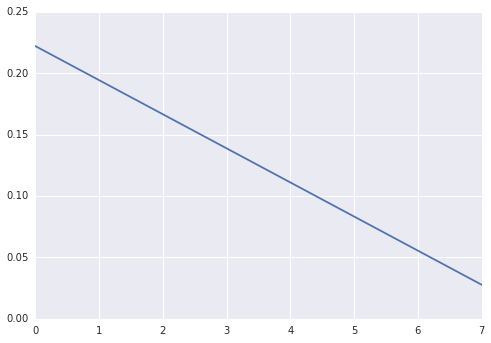

In [1243]:
proj_eig_v = pd.DataFrame(np.real(S.dot(v)))
proj_eig_v = proj_eig_v / proj_eig_v.sum()
proj_eig_v[i_eq].plot()

In [1145]:
zzz = sorted(zip(range(len(l)), np.abs(l), np.angle(l, deg=True)), key=lambda x: -x[1])
print "EIGENVALUES"
print "IDX  MAG       ANGLE"
for i, m, a in zzz:
    print "%s" % i, "   %.4f    %+.3f°" % (m, a)

EIGENVALUES
IDX  MAG       ANGLE
14    1.0000    +0.000°
17    0.9828    +0.000°
28    0.9591    +0.719°
29    0.9591    -0.719°
51    0.9353    +2.094°
52    0.9353    -2.094°
53    0.9326    +0.000°
15    0.9248    +12.477°
16    0.9248    -12.477°
58    0.9160    +4.032°
59    0.9160    -4.032°
26    0.9103    +10.858°
27    0.9103    -10.858°
81    0.9077    +1.411°
82    0.9077    -1.411°
54    0.9046    +6.335°
55    0.9046    -6.335°
37    0.9028    +8.717°
38    0.9028    -8.717°
91    0.8996    +0.000°
89    0.8885    +3.402°
90    0.8885    -3.402°
39    0.8877    +10.225°
40    0.8877    -10.225°
102    0.8827    +0.000°
87    0.8782    +5.748°
88    0.8782    -5.748°
64    0.8781    +8.135°
65    0.8781    -8.135°
123    0.8723    +1.504°
124    0.8723    -1.504°
129    0.8642    +2.010°
130    0.8642    -2.010°
100    0.8570    +6.751°
101    0.8570    -6.751°
60    0.8562    +10.797°
61    0.8562    -10.797°
125    0.8552    +4.372°
126    0.8552    -4.372°
137    0.8521 

In [1146]:
i = i_eq
print "EIG:", "\t%.4f\t%+.4f°" % (np.abs(l[i]), np.angle(l[i], deg=True))
print
print "STATE       MAG       ANGLE"
zzz = zip(p.enum_states(), np.array(v[:, i].transpose())[0].transpose())
zzz = sorted(zzz, key=lambda x: np.angle(x[1]))

for s, val in zzz:
    if np.abs(val) > 1e-10:
        print s, "  ", "%.4f\t%+.4f°" % (np.abs(val), np.angle(val, deg=True))

EIG: 	1.0000	+0.0000°

STATE       MAG       ANGLE
00000000    0.0025	+0.0000°
00000001    0.0025	+0.0000°
00000010    0.0051	+0.0000°
00000011    0.0025	+0.0000°
00000100    0.0076	+0.0000°
00000101    0.0051	+0.0000°
00000110    0.0076	+0.0000°
00000111    0.0025	+0.0000°
00001000    0.0102	+0.0000°
00001001    0.0076	+0.0000°
00001010    0.0127	+0.0000°
00001011    0.0051	+0.0000°
00001100    0.0153	+0.0000°
00001101    0.0076	+0.0000°
00001110    0.0102	+0.0000°
00001111    0.0025	+0.0000°
00010000    0.0127	+0.0000°
00010001    0.0102	+0.0000°
00010010    0.0178	+0.0000°
00010011    0.0076	+0.0000°
00010100    0.0229	+0.0000°
00010101    0.0127	+0.0000°
00010110    0.0178	+0.0000°
00010111    0.0051	+0.0000°
00011000    0.0255	+0.0000°
00011001    0.0153	+0.0000°
00011010    0.0229	+0.0000°
00011011    0.0076	+0.0000°
00011100    0.0255	+0.0000°
00011101    0.0102	+0.0000°
00011110    0.0127	+0.0000°
00011111    0.0025	+0.0000°
00100000    0.0153	+0.0000°
00100001    0.0127	+0.000

In [143]:
def proj_to_simplex(P, x):
    px0 = P.dot(x)
    if np.min(px0) < 0:
        px0 = px0 - np.min(px0)
    px0 = px0 / np.sum(px0)
    return px0

def eigs(v, x0, eps=1e-12):
    eigs = sorted([(np.log(r), c) for r, c in zip(np.abs(l), np.abs(np.linalg.solve(v, x0))) if c > eps and np.log(r) < -eps], key=lambda x: -x[0])
    return eigs

def smallest_eig(v, x0, eps=1e-12):
    eigs = sorted([(np.log(r), c) for r, c in zip(np.abs(l), np.abs(np.linalg.solve(v, x0))) if c > eps and np.log(r) < -eps], key=lambda x: -x[0])
    smallest_eig = eigs[0][0]
    return smallest_eig

def biggest_eig(v, x0, eps=1e-12):
    return sorted(eigs(v, x0), key=lambda x:-x[1])[0][0]

In [1148]:
M = T.shape[0]
x0 = np.zeros(M)
x0[45] = 1 #
print "Pick just one state:", np.argmax(x0)
print "Corresponding to sequence:", State(S.dot(x0))

Pick just one state: 45
Corresponding to sequence: 00101101


In [1149]:
vv = np.sum(V.todense(), axis=0)
vv = np.matrix(vv)
vv2 = np.diag(vv.transpose().dot(vv))
vv2 = np.matrix(vv2).transpose()

iters = 800
R = np.zeros((iters, N))
X = np.zeros((iters, M))

exp_v = np.zeros(iters)
var_v = np.zeros(iters)

x = x0
for i in range(iters):
#     print " ".join(["%.4f" % s for s in S.dot(x)])
    
    exp_v[i] = vv.dot(x)
    var_v[i] = np.sqrt(max(vv2.transpose().dot(x) - exp_v[i]**2, 0))
    R[i] = S.dot(x)
    X[i] = x
    
    x = T.dot(x)

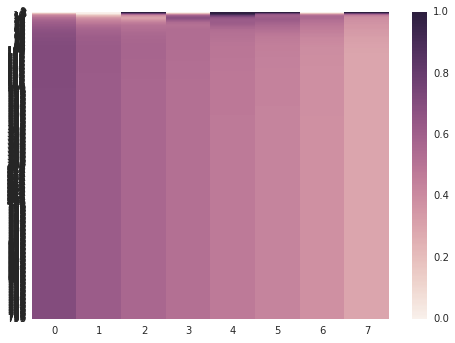

In [1150]:
sns.heatmap(R);

In [645]:
Ss = (pd.DataFrame(X.transpose(), index=sp).reset_index().groupby('index').sum())

In [646]:
ms = (Ss.reset_index()['index'].values[:, None] * Ss).sum()
vs = (Ss.reset_index()['index'].values[:, None]**2 * Ss).sum() - ms**2

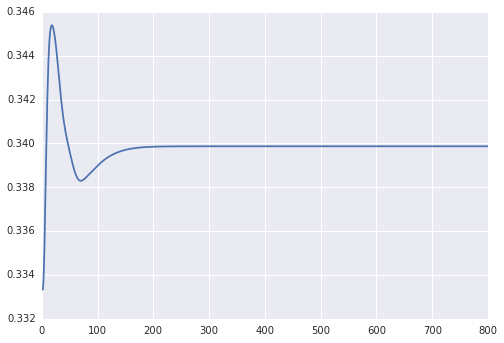

In [648]:
plt.plot(ms)
# plt.plot(np.sqrt(vs))

In [649]:
sp = np.sum(V.todense(), axis=1).transpose().tolist()[0]

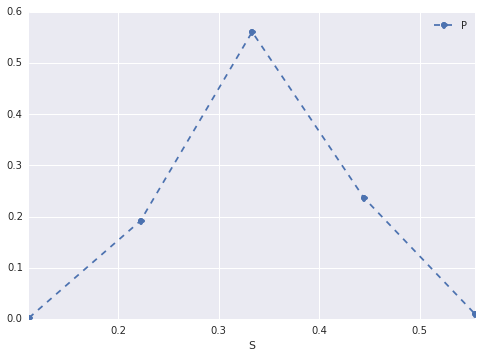

In [650]:
eq_sp = pd.DataFrame(zip(sp, (v[:, i_eq] / v[:i, i_eq].sum()).transpose().tolist()[0]), columns=["S", "P"]).groupby("S").sum()
eq_sp.plot(style="--o")

In [659]:
eq_sp

,S,P
0,0.111111,0.001851
1,0.222222,0.191691
2,0.333333,0.560880
3,0.444444,0.236940
4,0.555556,0.008638


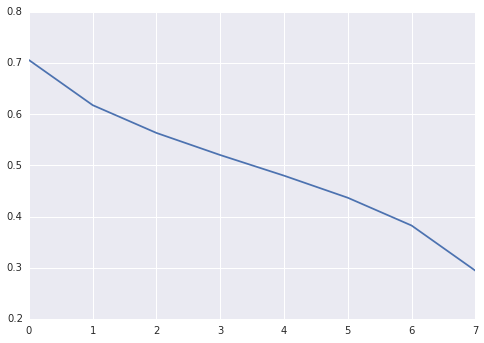

In [654]:
plt.plot(R[-1])

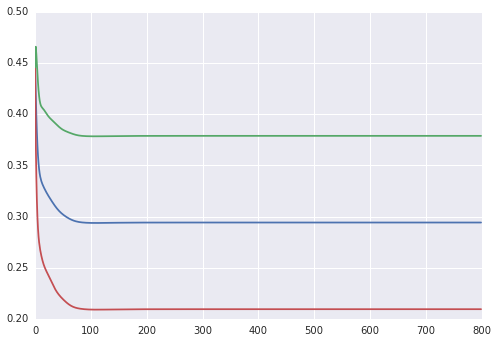

In [655]:
plt.plot(exp_v)
plt.plot(exp_v + var_v)
plt.plot(exp_v - var_v)

In [656]:
iters=800
speed_paths = np.zeros((M, iters))
j = 0
for j in range(M):
    x = np.zeros(M)
    x[j] = 1
    for i in range(iters):
        speed_paths[j, i] = vv.dot(x)
        x = T.dot(x)

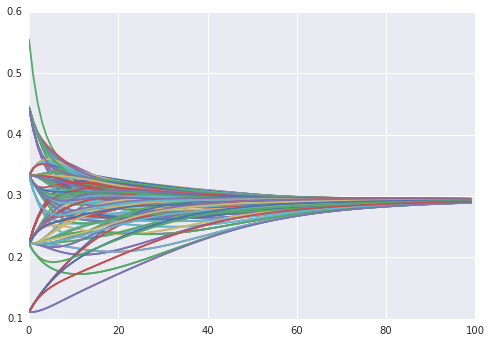

In [657]:
plt.plot(speed_paths.transpose()[:100]);
# plt.ylim((0., .6));

$$ {k-1 \choose r} {n-k-1 \choose r-1} + 2  {k-1 \choose r-1} {n-k-1 \choose r-1} +  {k-1 \choose r-1} {n-k-1 \choose r}$$

For $k = n/2$

$$ {n/2-1 \choose r-1} \left[{n/2-1 \choose r}  + 2   {n/2-1 \choose r-1} +   {n/2-1 \choose r} \right]$$
$$ 2 {n/2-1 \choose r-1} \left[{n/2-1 \choose r}  +  {n/2-1 \choose r-1}  \right]$$
$$ 2 {n/2-1 \choose r-1} {n/2 \choose r} $$
$$ 2 \frac{(\frac{n}{2} - 1)!}{(\frac{n}{2} - r)! (r-1)!} \frac{(\frac{n}{2})!}{(\frac{n}{2} - r)! r!} $$
$$ \frac{n}{r} {n/2-1 \choose r-1}^2 $$
$$ \frac{n}{r} \left(\frac{n}{2} B\left(\frac{n}{2} - r + 1, r\right)\right)^{-2} $$
$$ \frac{4}{nr} \left(\left(\frac{n - 2r}{n}\right) B\left(\frac{n}{2} - r, r\right)\right)^{-2} $$
$$ \frac{4}{nr}\frac{n^2}{(n - 2r)^2} \left( B\left(\frac{n}{2} - r, r\right)\right)^{-2} $$

\begin{align*}
    0 &= \frac{\partial}{\partial r} {n/2-1 \choose r-1} {n/2 \choose r}\\
    &= \frac{\partial}{\partial r} \frac{(\frac{n}{2} - 1)!}{(\frac{n}{2} - r)! (r-1)!} \frac{(\frac{n}{2})!}{(\frac{n}{2} - r)! r!} \\
    &= \frac{n}{2r} \left(\frac{(\frac{n}{2} - 1)!}{(\frac{n}{2} - r)! (r-1)!}\right)^2
\end{align*}

In [918]:
def count(N, k, R):
    return ncr(k-1, R) * ncr(N-k-1, R-1) + 2 * ncr(k-1, R-1)* ncr(N - k-1, R-1) + ncr(k-1, R-1) * ncr(N - k - 1, R)

@np.vectorize
def prob(N, k, R):
    return 1. * count(N, k, R) / ncr(N, k)

def mid(N, R):
    return 2 * ncr(N / 2 - 1, R-1) * ncr(N/2, R)

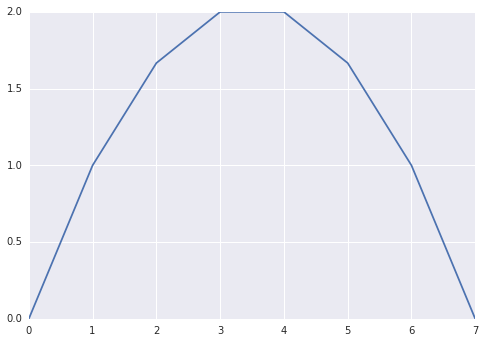

In [1225]:
rr = dict()
for NN in range(2, 100):
    x, y = zip(*[(k, sum(prob(NN, k, range(k+1)) * range(k+1))) for k in range(0, NN+1)])
    if NN == 7:
        plt.plot(x, y)
    rr[NN] = (np.max(y), max_speed(NN))

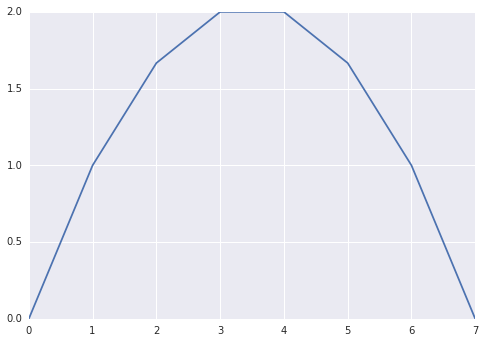

In [1258]:
rr = dict()
for NN in range(2, 100):
    x, y = zip(*[(k, sum(prob(NN, k, range(k+1)) * range(k+1))) for k in range(0, NN+1)])
    if NN == 7:
        plt.plot(x, y)
    rr[NN] = (np.max(y) / NN, max_speed(NN))

In [1219]:
rrr[rrr.index.values % 2 == 1][0]

3      1.0
5      1.5
7      2.0
9      2.5
11     3.0
13     3.5
15     4.0
17     4.5
19     5.0
21     5.5
23     6.0
25     6.5
27     7.0
29     7.5
31     8.0
33     8.5
35     9.0
37     9.5
39    10.0
41    10.5
43    11.0
45    11.5
47    12.0
49    12.5
51    13.0
53    13.5
55    14.0
57    14.5
59    15.0
61    15.5
63    16.0
65    16.5
67    17.0
69    17.5
71    18.0
73    18.5
75    19.0
77    19.5
79    20.0
81    20.5
83    21.0
85    21.5
87    22.0
89    22.5
91    23.0
93    23.5
95    24.0
97    24.5
99    25.0
Name: 0, dtype: float64

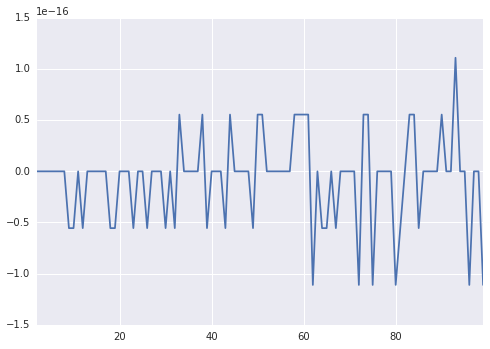

In [1259]:
rrr = pd.DataFrame(rr).transpose()
(rrr[0] - rrr[1]).plot()

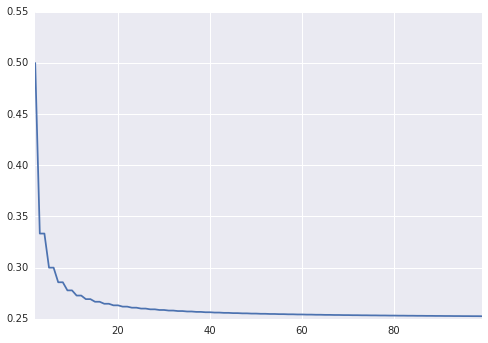

In [1260]:
rrr[0].plot()

In [1214]:
rrr[0][rrr.index.values %2 == 1]

3      1.0
5      1.5
7      2.0
9      2.5
11     3.0
13     3.5
15     4.0
17     4.5
19     5.0
21     5.5
23     6.0
25     6.5
27     7.0
29     7.5
31     8.0
33     8.5
35     9.0
37     9.5
39    10.0
41    10.5
43    11.0
45    11.5
47    12.0
49    12.5
51    13.0
53    13.5
55    14.0
57    14.5
59    15.0
61    15.5
63    16.0
65    16.5
67    17.0
69    17.5
71    18.0
73    18.5
75    19.0
77    19.5
79    20.0
81    20.5
83    21.0
85    21.5
87    22.0
89    22.5
91    23.0
93    23.5
95    24.0
97    24.5
99    25.0
Name: 0, dtype: float64

1.0000000000000064

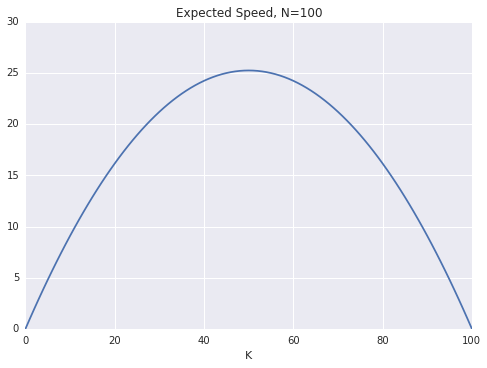

In [1076]:
NN = 100
x, y = zip(*[(k, sum(prob(NN, k, range(k+1)) * range(k+1))) for k in range(0, NN+1)])
plt.plot(x, y)
plt.title("Expected Speed, N=%s" % NN)
plt.xlabel("K");
np.max(y)

In [1213]:
max_speed(5)

1.5625


$$M =\frac{N}{4} \frac{N}{N-1}, ~~\text{for }N\text{ even}$$


$$M = \frac{N+1}{4}, ~~\text{for }N\text{ odd}$$

In [1222]:
@np.vectorize
def max_speed(N):
    if N % 2 == 0:
        return N**2 / (4. * (N - 1.))
    else:
        return (N + 1.) / 4.

In [1250]:
from speeds import max_speed

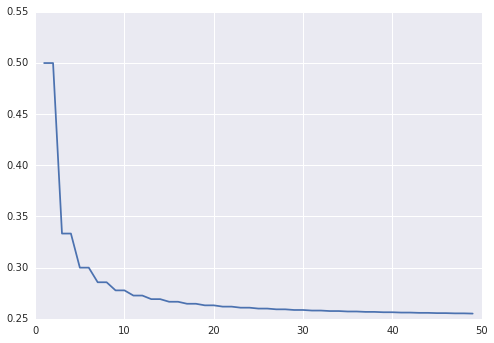

In [1253]:
N = np.array(range(1, 50))
plt.plot(N, max_speed(N))

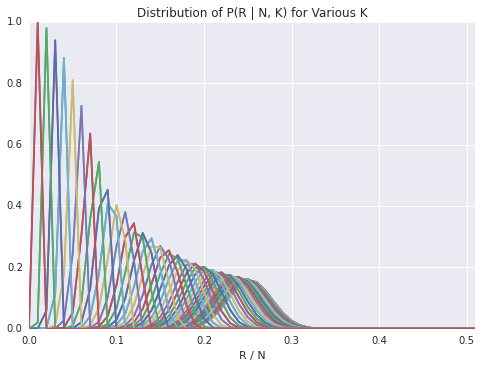

In [1059]:
NN = 100
for KK in range(1, NN):
    pd.Series(dict([(1. * r/NN, 1. *prob(NN, KK, r)) for r in range(NN/2+2)])).plot(label=N, style="-")
plt.xlabel("R / N")
plt.title("Distribution of P(R | N, K) for Various K");

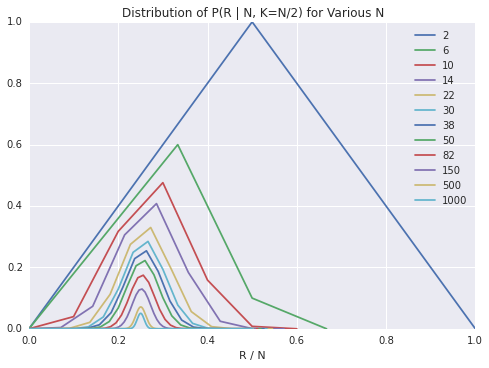

In [1089]:
for N in [2, 6, 10, 14, 22, 30, 38, 50, 82, 150, 500, 1000]:
    pd.Series(dict([(1. * r/N, 1. *mid(N, r) / ncr(N, N/2)) for r in range(N/2+2)])).plot(label=N, style="-")
# plt.legend()
plt.xlabel("R / N")
plt.title("Distribution of P(R | N, K=N/2) for Various N")
plt.legend();

In [1168]:
import scipy.stats as stats

In [1169]:
stats.norm.pdf(4, 0, 1)

0.00013383022576488537

Mean: 0.252525252525
Std: 0.0249987245874


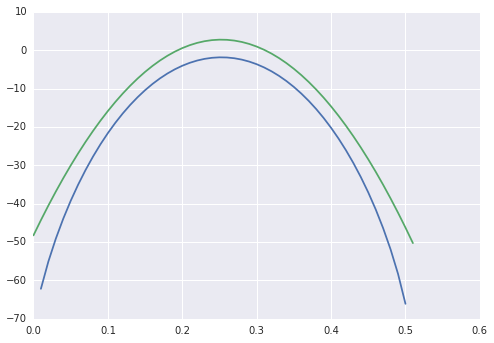

In [1248]:
N = 100
vals = pd.Series(dict([(1. * r/N, 1. *mid(N, r) / ncr(N, N/2)) for r in range(N/2+2)]))
vals = pd.DataFrame([vals.index, vals], index=['X', 'P']).transpose()
m = (vals['X'] * vals['P']).sum()
s = np.sqrt((vals['X']**2 * vals['P']).sum() - (vals['X'] * vals['P']).sum()**2)
print "Mean:", m
print "Std:", s
plt.plot(vals['X'], np.log(vals['P']))
plt.plot(vals['X'], np.log(stats.norm.pdf(vals['X'], m, s)))

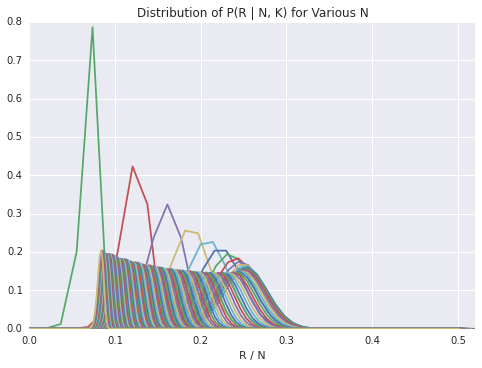

In [1042]:
KK = 50
for N in range(KK, 550, 4):
    pd.Series(dict([(1. * r/N, 1. *prob(N, KK, r)) for r in range(N/2+2)])).plot(label=N, style="-")
plt.xlabel("R / N")
plt.title("Distribution of P(R | N, K) for Various N");

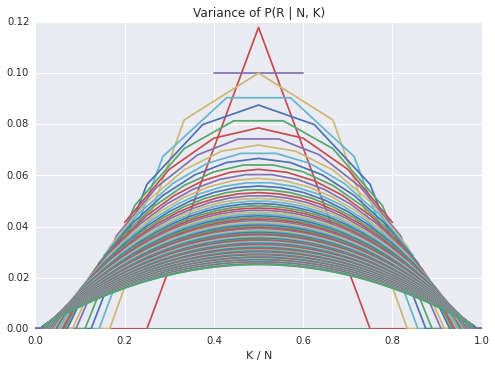

In [1041]:
NN = 50
for NN in range(2, 100):
    x, m, var = zip(*[
            (
                1. * k/NN, 
                np.sum(np.array(range(NN)) * prob(NN, k, range(NN))) / NN,
                np.sum(np.array(range(NN))**2 * prob(NN, k, range(NN))) / NN**2,
            ) for k in range(NN+1)])
#     plt.plot(x, m)
    plt.plot(x, np.sqrt(np.array(var) - np.array(m)**2))
plt.xlabel("K / N")
plt.title("Variance of P(R | N, K)")

In [804]:
NN = 200
oR_probs = pd.DataFrame([[1. * count(NN, zz, z) / ncr(NN, zz) for z in range(1, NN/2+1)] for zz in range(NN)]).transpose()

In [820]:
means = (oR_probs.index.values[:, None] * oR_probs).sum()
stds = np.sqrt((oR_probs.index.values[:, None]**2 * oR_probs).sum())

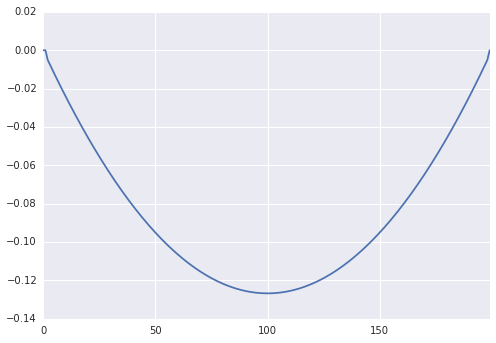

In [822]:
(means-stds).plot()
# stds.plot()

In [1565]:
p = BoundaryProcess(6)

In [1567]:
states = p.enum_states()

In [ ]:
s.num_open_to_right()

In [1572]:
s  = State('110')

In [1571]:
memo = dict()

In [1575]:
memo = dict()
def find_cat(s):
    state = State(s, cycle=False)
    if state.num_open_to_right() == 0:
        memo[s] = (0, 1)
        return (0, 1)
    else:
        R = state.open_spots_to_right()
        depth = 0
        count = 0
        for r in R:
            d, c = find_cat(str(state.move_right(r)))
            count += c
            depth = max(depth, d + 1)
        memo[s] = (depth, count)
        return (depth, count)

In [1578]:
"%sx%s" % find_cat("101010")

'6x16'

In [1579]:
[(s, "%sx%s" % find_cat(s)) for s in states]

[('000000', '0x1'),
 ('000001', '0x1'),
 ('000010', '1x1'),
 ('000011', '0x1'),
 ('000100', '2x1'),
 ('000101', '1x1'),
 ('000110', '2x1'),
 ('000111', '0x1'),
 ('001000', '3x1'),
 ('001001', '2x1'),
 ('001010', '3x2'),
 ('001011', '1x1'),
 ('001100', '4x2'),
 ('001101', '2x1'),
 ('001110', '3x1'),
 ('001111', '0x1'),
 ('010000', '4x1'),
 ('010001', '3x1'),
 ('010010', '4x3'),
 ('010011', '2x1'),
 ('010100', '5x5'),
 ('010101', '3x2'),
 ('010110', '4x3'),
 ('010111', '1x1'),
 ('011000', '6x5'),
 ('011001', '4x2'),
 ('011010', '5x5'),
 ('011011', '2x1'),
 ('011100', '6x5'),
 ('011101', '3x1'),
 ('011110', '4x1'),
 ('011111', '0x1'),
 ('100000', '5x1'),
 ('100001', '4x1'),
 ('100010', '5x4'),
 ('100011', '3x1'),
 ('100100', '6x9'),
 ('100101', '4x3'),
 ('100110', '5x6'),
 ('100111', '2x1'),
 ('101000', '7x14'),
 ('101001', '5x5'),
 ('101010', '6x16'),
 ('101011', '3x2'),
 ('101100', '7x21'),
 ('101101', '4x3'),
 ('101110', '5x4'),
 ('101111', '1x1'),
 ('110000', '8x14'),
 ('110001', '6x5

In [1580]:
strings = """
                             1 000000 0x1   
                             1 000001 0x1   
                           2*a 000010 1x1   
                             1 000011 0x1   
                     2*a^2 + a 000100 2x1   
                           2*a 000101 1x1   
                     2*a^2 + a 000110 2x1   
                             1 000111 0x1   
               2*a^3 + a^2 + a 001000 3x1   
                     2*a^2 + a 001001 2x1   
                 2*a^3 + 3*a^2 001010 3x2   
                           2*a 001011 2x1   
                 4*a^3 + 2*a^2 001100 4x2   
                     2*a^2 + a 001101 2x1   
               2*a^3 + a^2 + a 001110 3x1   
                             1 001111 0x1   
         2*a^4 + a^3 + a^2 + a 010000 4x1   
               2*a^3 + a^2 + a 010001 3x1   
         2*a^4 + 3*a^3 + 2*a^2 010010 4x3   
                     2*a^2 + a 010011 2x1   
           4*a^4 + 4*a^3 + a^2 010100 5x5   
                 2*a^3 + 3*a^2 010101 3x2   
         2*a^4 + 3*a^3 + 2*a^2 010110 4x3   
                           2*a 010111 1x1   
           6*a^4 + 3*a^3 + a^2 011000 6x5   
                 4*a^3 + 2*a^2 011001 4x2   
           4*a^4 + 4*a^3 + a^2 011010 5x5   
                     2*a^2 + a 011011 2x1
           6*a^4 + 3*a^3 + a^2 011100 6x5
               2*a^3 + a^2 + a 011101 3x1
         2*a^4 + a^3 + a^2 + a 011110 4x1
                             1 011111 1x1
   2*a^5 + a^4 + a^3 + a^2 + a 100000 5x1
         2*a^4 + a^3 + a^2 + a 100001 4x1
 2*a^5 + 3*a^4 + 2*a^3 + 2*a^2 100010 5x4
               2*a^3 + a^2 + a 100011 3x1
   4*a^5 + 4*a^4 + 3*a^3 + a^2 100100 6x9
         2*a^4 + 3*a^3 + 2*a^2 100101 4x3
   2*a^5 + 3*a^4 + 4*a^3 + a^2 100110 5x6
                     2*a^2 + a 100111 2x1
   6*a^5 + 5*a^4 + 2*a^3 + a^2 101000 7x14
           4*a^4 + 4*a^3 + a^2 101001 5x5
         4*a^5 + 6*a^4 + 4*a^3 101010 6x16
                 2*a^3 + 3*a^2 101011 3x2
         6*a^5 + 7*a^4 + 3*a^3 101100 7x27
         2*a^4 + 3*a^3 + 2*a^2 101101 4x3
 2*a^5 + 3*a^4 + 2*a^3 + 2*a^2 101110 5x4
                           2*a 101111 1x1
   8*a^5 + 4*a^4 + 2*a^3 + a^2 110000 8x14
           6*a^4 + 3*a^3 + a^2 110001 6x5
         6*a^5 + 7*a^4 + 3*a^3 110010 7x27
                 4*a^3 + 2*a^2 110011 4x2
        10*a^5 + 7*a^4 + 2*a^3 110100 8x54
           4*a^4 + 4*a^3 + a^2 110101 5x5
   4*a^5 + 4*a^4 + 3*a^3 + a^2 110110 6x9
                     2*a^2 + a 110111 2x1
        12*a^5 + 6*a^4 + 2*a^3 111000 9x54
           6*a^4 + 3*a^3 + a^2 111001 6x5
   6*a^5 + 5*a^4 + 2*a^3 + a^2 111010 7x14
               2*a^3 + a^2 + a 111011 3x1
   8*a^5 + 4*a^4 + 2*a^3 + a^2 111100 8x14
         2*a^4 + a^3 + a^2 + a 111101 4x1
   2*a^5 + a^4 + a^3 + a^2 + a 111110 5x1 
                             1 111111 0x1
"""

In [1592]:
zz = [[z[:30].strip()] + z[30:].split() for z in strings.split("\n") if len(z) > 1]

In [1608]:
pairs = [(z[1], memo[z[1]], z[0]) for z in zz]

In [1609]:
zz[1][2]

'0x1'

In [1617]:
set([(x[1], x[2]) for x in pairs])

{((0, 1), '1'),
 ((1, 1), '2*a'),
 ((2, 1), '2*a^2 + a'),
 ((3, 1), '2*a^3 + a^2 + a'),
 ((3, 2), '2*a^3 + 3*a^2'),
 ((4, 1), '2*a^4 + a^3 + a^2 + a'),
 ((4, 2), '4*a^3 + 2*a^2'),
 ((4, 3), '2*a^4 + 3*a^3 + 2*a^2'),
 ((5, 1), '2*a^5 + a^4 + a^3 + a^2 + a'),
 ((5, 4), '2*a^5 + 3*a^4 + 2*a^3 + 2*a^2'),
 ((5, 5), '4*a^4 + 4*a^3 + a^2'),
 ((5, 6), '2*a^5 + 3*a^4 + 4*a^3 + a^2'),
 ((6, 5), '6*a^4 + 3*a^3 + a^2'),
 ((6, 9), '4*a^5 + 4*a^4 + 3*a^3 + a^2'),
 ((6, 16), '4*a^5 + 6*a^4 + 4*a^3'),
 ((7, 14), '6*a^5 + 5*a^4 + 2*a^3 + a^2'),
 ((7, 21), '6*a^5 + 7*a^4 + 3*a^3'),
 ((8, 14), '8*a^5 + 4*a^4 + 2*a^3 + a^2'),
 ((8, 42), '10*a^5 + 7*a^4 + 2*a^3'),
 ((9, 42), '12*a^5 + 6*a^4 + 2*a^3')}

In [1624]:
[x for x in pairs if x[1] == (5, 5)]

[('010100', (5, 5), '4*a^4 + 4*a^3 + a^2'),
 ('011010', (5, 5), '4*a^4 + 4*a^3 + a^2'),
 ('101001', (5, 5), '4*a^4 + 4*a^3 + a^2'),
 ('110101', (5, 5), '4*a^4 + 4*a^3 + a^2')]